# Facebook marketplace recommendation

This notbook shows the result of the repo https://github.com/chrisyw0/fb_marketplace_recommendation

Assuming the product and images datasets (in pickle file format), and image zip file have been saved in the google drive. 

For more detailed instruction, please check the README file in the repo. 

## Mount Google Drive and copy required files into this notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content
!rm -rf ./fb_marketplace_recommendation

/content


In [ ]:
!git clone https://github.com/chrisyw0/fb_marketplace_recommendation.git ./fb_marketplace_recommendation
%cd ./fb_marketplace_recommendation

Cloning into './fb_marketplace_recommendation'...
remote: Enumerating objects: 202, done.
remote: Counting objects: 100% (202/202), done.
remote: Compressing objects: 100% (148/148), done.
remote: Total 202 (delta 123), reused 112 (delta 52), pack-reused 0
Receiving objects: 100% (202/202), 776.09 KiB | 5.97 MiB/s, done.
Resolving deltas: 100% (123/123), done.
/content/fb_marketplace_recommendation


### For time saving purpose - the data has been downloaded and cleaned. Skip the following cells if you don't have data

In [ ]:
!mkdir data
!cp /content/drive/MyDrive/FB_marketplace/data/product.pkl ./data/product.pkl
!cp /content/drive/MyDrive/FB_marketplace/data/image.pkl ./data/image.pkl
!cp /content/drive/MyDrive/FB_marketplace/data/product_clean.pkl ./data/product_clean.pkl
!cp /content/drive/MyDrive/FB_marketplace/data/image_clean.pkl ./data/image_clean.pkl

In [ ]:
!cp /content/drive/MyDrive/FB_marketplace/data/images_fb.zip ./data/images_fb.zip

In [ ]:
!unzip -qq ./data/images_fb.zip -d ./data/

## Install required packages

In [ ]:
!pip install geopandas
!pip install --upgrade gensim
!pip install --upgrade tensorflow

     |████████████████████████████████| 1.0 MB 4.8 MB/s 
     |████████████████████████████████| 6.3 MB 58.7 MB/s 
     |████████████████████████████████| 16.7 MB 81 kB/s 
     |████████████████████████████████| 24.1 MB 1.6 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0
     |████████████████████████████████| 462 kB 5.0 MB/s 


## Environment setup - you may need to setup environmental variables for downloading the data. For more details, please check the README in the repo

In [ ]:
import sys
sys.path.append("/content/drive/fb_marketplace_recommendation/")

from classes.data_preparation.download_data import DataDownloader
from classes.data_preparation.visualize_data import DataVisializer
from classes.data_preparation.clean_images import ImageCleaner
from classes.data_preparation.clean_tabular import TabularDataCleaner
from classes.ml_approach.ml_method import MachineLearningPredictor
from classes.cnn_approach.image_model import ImageModel
from classes.cnn_approach.text_model import TextModel
from classes.cnn_approach.combine_model import ImageTextModel

## Milestone 1 Download and clean the data 

Try reloading from cached file for product and image dataframe
Load data success, tabular data shape (8091, 9), image data shape (12604, 5)
Images data already existed
Reload from ./data/image_clean.pkl for clean image dataframe
Clean data success, new shape (11128, 10)
                                     id                            product_id  \
0  912bb259-3ad9-457b-9db1-ce1da9016057  5f5f57d7-778f-4336-bb10-b43863418c8c   
1  b166d305-b852-4bdd-83f4-465b20da94fa  5f5f57d7-778f-4336-bb10-b43863418c8c   
2  68f5a29d-0075-4d60-81c1-ab684a82e50c  c2c8949f-3cde-4651-a234-4a4a1b2a9ad4   
3  f6a309d7-d247-446a-9b5e-aceefdd4334d  c2c8949f-3cde-4651-a234-4a4a1b2a9ad4   
4  2c2b3a6f-15b3-4289-937a-15482d9f5781  8292aa4e-7f1b-4655-bf0e-f1f2c9e3ffaf   

                                         bucket_link         image_ref  \
0  https://aicore-product-images.s3.amazonaws.com...  koQAAOSwhZRiE5dD   
1  https://aicore-product-images.s3.amazonaws.com...  9vgAAOSw8sRiE5dE   
2  https://aicore-pr

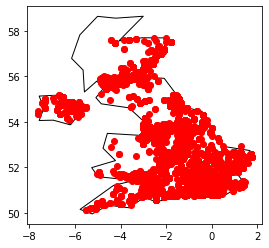

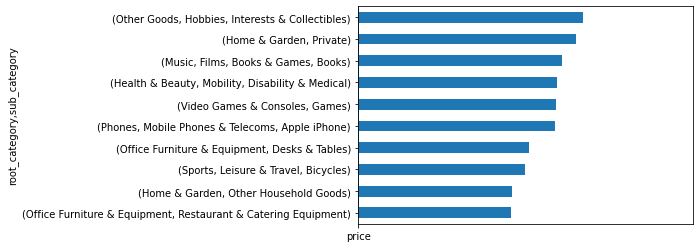

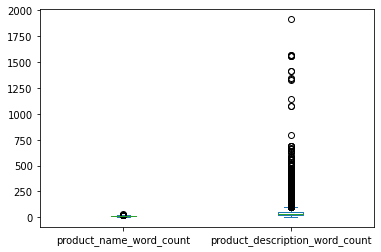

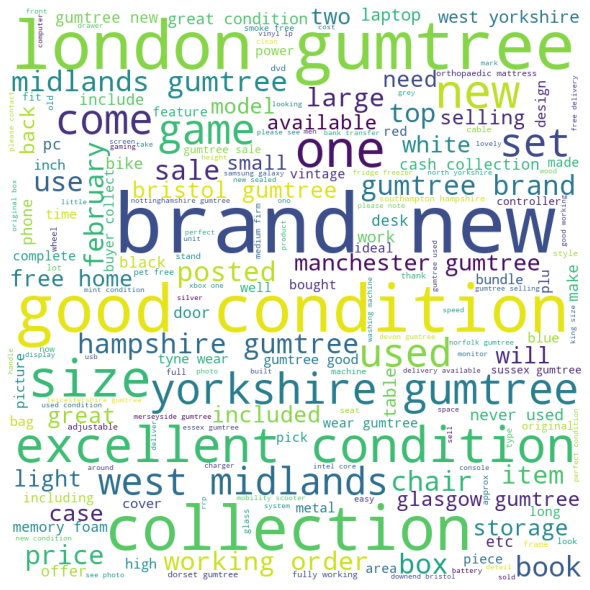

        image_width  image_height   image_ratio
count  11128.000000  11128.000000  11128.000000
mean     804.659597    879.939162      0.945865
std      170.810798    155.302589      0.273763
min      155.000000    194.000000      0.500000
25%      736.750000    768.000000      0.750000
50%      768.000000    875.500000      0.750000
75%     1024.000000   1024.000000      1.333333
max     1024.000000   1024.000000      1.500000


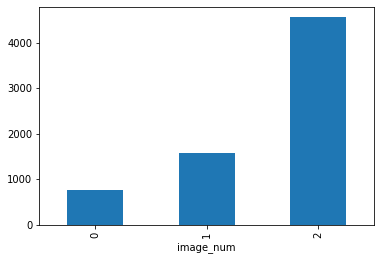

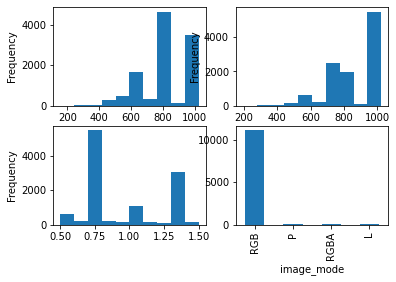

In [ ]:
# milestone 1: Download and clean the data
downloader = DataDownloader()

df_product, df_image = downloader.download_data()
downloader.download_images()

image_cleaner = ImageCleaner(df_image, df_product)
df_image_clean = image_cleaner.get_clean_image_data()

product_cleaner = TabularDataCleaner(df_product, df_image_clean)
df_product_clean = product_cleaner.get_clean_product_data()

visualiser = DataVisializer(df_product_clean, df_image_clean)
visualiser.visualise_data()

## Milestone 2 - ML models

In [ ]:
# milestone 2: Create machine learning models for price prediction and
# image category classification
ml_model_predictor = MachineLearningPredictor(df_product_clean, df_image_clean)

ml_model_predictor.predict_price()
ml_model_predictor.predict_product_type()

Linear Regression Result:
Coef: [139.02714798 225.56543063  13.09849676 -10.4954614  -18.73582537
 -65.64617674 -24.37482656  91.17844257 -35.58303102   8.34879788
   8.83292528 -78.462138    61.16996268 -12.54085304 118.22410123
  28.99837266  27.30790182]
Interception: 71.09811782031943
RMSE: 170.28221400570627


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Logistic Regression Result:
Coef: [[-0.01399157 -0.02433827 -0.00329919 ... -0.00837498 -0.00656847
  -0.00416039]
 [-0.07868215 -0.07354476  0.00247005 ...  0.00048478  0.00215161
   0.00194473]
 [-0.00076407  0.01741754 -0.00214697 ...  0.00305595  0.00086273
  -0.00054879]
 ...
 [-0.01826218  0.00835133  0.0090351  ... -0.00793322 -0.00643632
  -0.00398639]
 [-0.00069457 -0.01253153 -0.0011524  ...  0.00388425  0.00434404
   0.00641932]
 [ 0.07773272  0.10061531 -0.00402184 ...  0.00451085  0.00718419
   0.00722228]]
Interception: [-0.02179961 -0.03847726 -0.01833557  0.12877898 -0.05377419 -0.00350835
 -0.08883004  0.01021826 -0.03733043  0.01334907 -0.00197639  0.00520435
  0.10648116]
                                  precision    recall  f1-score   support

                      Appliances       0.09      0.08      0.09       173
               Baby & Kids Stuff       0.14      0.13      0.14       127
 Clothes, Footwear & Accessories       0.11      0.10      0.11       143
   

(LogisticRegression(),
 {'Appliances': {'f1-score': 0.0851063829787234,
   'precision': 0.08974358974358974,
   'recall': 0.08092485549132948,
   'support': 173},
  'Baby & Kids Stuff': {'f1-score': 0.1354581673306773,
   'precision': 0.13709677419354838,
   'recall': 0.13385826771653545,
   'support': 127},
  'Clothes, Footwear & Accessories': {'f1-score': 0.10869565217391304,
   'precision': 0.11278195488721804,
   'recall': 0.1048951048951049,
   'support': 143},
  'Computers & Software': {'f1-score': 0.13812154696132595,
   'precision': 0.14204545454545456,
   'recall': 0.13440860215053763,
   'support': 186},
  'DIY Tools & Materials': {'f1-score': 0.10876132930513595,
   'precision': 0.11320754716981132,
   'recall': 0.10465116279069768,
   'support': 172},
  'Health & Beauty': {'f1-score': 0.15934065934065933,
   'precision': 0.15591397849462366,
   'recall': 0.16292134831460675,
   'support': 178},
  'Home & Garden': {'f1-score': 0.17843866171003717,
   'precision': 0.161073825

## Milestone 3 - CNN Model for image classification

Training data path = /tmp/tmpb6mqgsyc
Validation data path = /tmp/tmpt0ghpibw
Testing data path = /tmp/tmpu62z0gf1
Found 6418 files belonging to 13 classes.
Found 2140 files belonging to 13 classes.
Found 2140 files belonging to 13 classes.
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 256, 256, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 256, 256, 3)      0         
 a)                                                              
                  

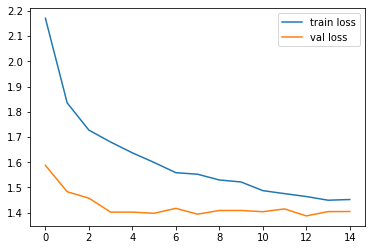

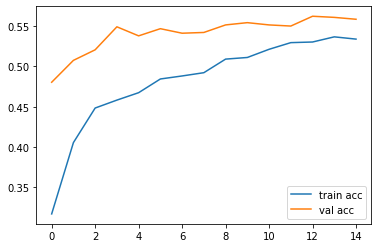

In [ ]:
# milestone 3: Create a image CNN model for category classification
image_model = ImageModel(df_product=df_product_clean, df_image=df_image_clean)
image_model.process()

In [ ]:
!tensorboard dev upload --logdir ./logs/image_model \
  --name "RestNetV50 based CNN image classification model" \
  --description "Training results for CNN models" \
  --one_shot

## Milestone 4 - CNN Model for Text classification

Start tokenising the product name and description
Creating a Word2Vec model, dimension 300, pre-train model None
Getting index from the embedding model
Prepare training, validation and testing data
Finish preparing data, shape of X_train (6418, 1458), shape of X_val (1079, 1458), shape of X_test (1057, 1458), shape of y_train (6418, 13), shape of y_val (1079, 13), shape of y_test (1057, 13)
Model created
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1458, 300)         8397600   
                                                                 
 conv1d (Conv1D)             (None, 1456, 48)          43248     
                                                                 
 average_pooling1d (AverageP  (None, 728, 48)          0         
 ooling1D)                                                       
                                            

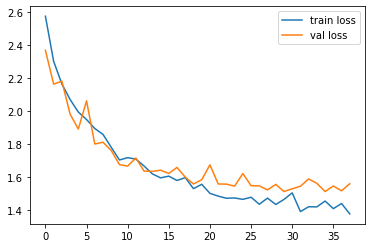

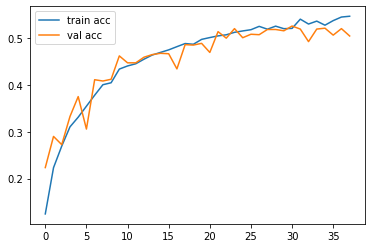

In [ ]:
# milestone 4: Create a text CNN model for category classification
text_model = TextModel(df_product=df_product_clean, df_image=df_image_clean)
text_model.process()

In [ ]:
!tensorboard dev upload --logdir ./logs/text_model \
  --name "CNN text classification model" \
  --description "Training results for CNN models" \
  --one_shot

## Milestone 5 - Combined CNN model

Start tokenising the product name and description
Creating a Word2Vec model, dimension 300, pre-train model None
Getting index from the embedding model
Prepare training, validation and testing data


/content/fb_marketplace_recommendation/classes/cnn_approach/image_text_tf_model.py:40: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.tokens = np.array(tokens)


94683136/94668760 [==============================] - 1s 0us/step
Model created
Model: "tf_image_text_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       multiple                  8397600   
                                                                 
 conv1d (Conv1D)             multiple                  43248     
                                                                 
 average_pooling1d (AverageP  multiple                 0         
 ooling1D)                                                       
                                                                 
 dropout (Dropout)           multiple                  0         
                                                                 
 conv1d_1 (Conv1D)           multiple                  3480      
                                                                 
 average_pooling1d_1 (Averag  mult

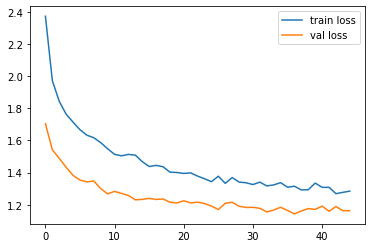

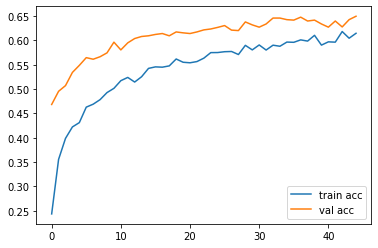

In [ ]:
# milestone 5: Combining image and text model for category classification
combine_model = ImageTextModel(df_product=df_product_clean, df_image=df_image_clean)
combine_model.process()

In [ ]:
!tensorboard dev upload --logdir ./logs/image_text_model \
  --name "Combined CNN classification model" \
  --description "Training results for CNN models" \
  --one_shot